In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start='2001-1-1'

end='2022-2-2'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,0.272321,0.260045,0.265625,0.265625,452312000.0,0.227114
2001-01-03,0.297991,0.257813,0.258929,0.292411,817073600.0,0.250017
2001-01-04,0.330357,0.300223,0.323940,0.304688,739396000.0,0.260514
2001-01-05,0.310268,0.286830,0.302455,0.292411,412356000.0,0.250017
2001-01-08,0.303292,0.284598,0.302455,0.295759,373699200.0,0.252879


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,158.784119
2022-01-28,170.350006,162.800003,165.710007,170.330002,179935700.0,169.863693
2022-01-31,175.000000,169.509995,170.160004,174.779999,115541600.0,174.301514
2022-02-01,174.839996,172.309998,174.009995,174.610001,86213900.0,174.131973
2022-02-02,175.880005,173.330002,174.750000,175.839996,84914300.0,175.358612


In [8]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2001-01-02,0.272321,0.260045,0.265625,0.265625,452312000.0,0.227114
1,2001-01-03,0.297991,0.257813,0.258929,0.292411,817073600.0,0.250017
2,2001-01-04,0.330357,0.300223,0.323940,0.304688,739396000.0,0.260514
3,2001-01-05,0.310268,0.286830,0.302455,0.292411,412356000.0,0.250017
4,2001-01-08,0.303292,0.284598,0.302455,0.295759,373699200.0,0.252879


In [9]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,0.272321,0.260045,0.265625,0.265625,452312000.0
1,0.297991,0.257813,0.258929,0.292411,817073600.0
2,0.330357,0.300223,0.323940,0.304688,739396000.0
3,0.310268,0.286830,0.302455,0.292411,412356000.0
4,0.303292,0.284598,0.302455,0.295759,373699200.0


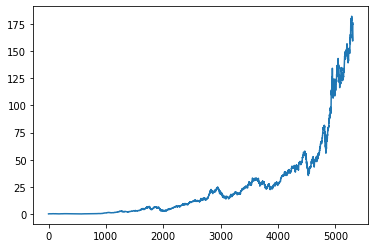

In [11]:
plt.plot(df.Close)

In [12]:
df


,High,Low,Open,Close,Volume
0,0.272321,0.260045,0.265625,0.265625,452312000.0
1,0.297991,0.257813,0.258929,0.292411,817073600.0
2,0.330357,0.300223,0.323940,0.304688,739396000.0
3,0.310268,0.286830,0.302455,0.292411,412356000.0
4,0.303292,0.284598,0.302455,0.295759,373699200.0
...,...,...,...,...,...
5301,163.839996,158.279999,162.449997,159.220001,121954600.0
5302,170.350006,162.800003,165.710007,170.330002,179935700.0
5303,175.000000,169.509995,170.160004,174.779999,115541600.0
5304,174.839996,172.309998,174.009995,174.610001,86213900.0


In [13]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5301    158.2046
5302    158.3410
5303    158.5377
5304    158.7431
5305    159.0118
Name: Close, Length: 5306, dtype: float64

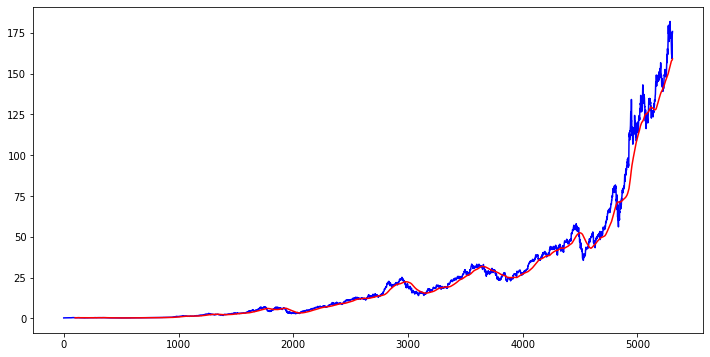

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(ma100,'r')

In [15]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5301    147.93765
5302    148.11680
5303    148.31990
5304    148.51875
5305    148.73240
Name: Close, Length: 5306, dtype: float64

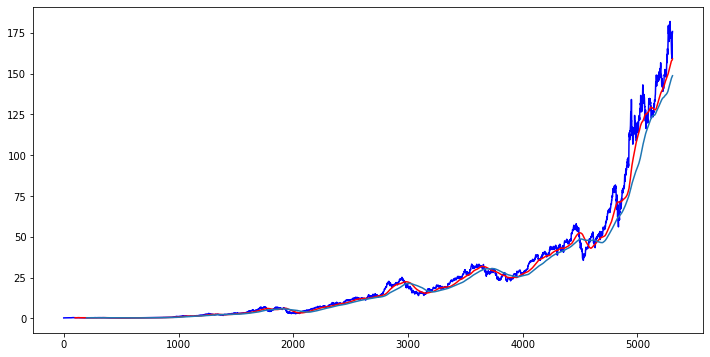

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(ma100,'r')
plt.plot(ma200)

In [19]:
df.shape


(5306, 5)

In [24]:
# splitting data into training and testing 
 
data_train= pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_test= pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])   
print(data_train.shape)
print(data_test.shape)
                                        

(4244, 1)
(1062, 1)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_train_array=scaler.fit_transform(data_train) 
data_train_array

array([[7.15082557e-04],
       [1.32627622e-03],
       [1.60640872e-03],
       ...,
       [9.97946408e-01],
       [9.91044029e-01],
       [9.87050957e-01]])

In [50]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
     x_train.append(data_train_array[i-100:i])
     y_train.append(data_train_array[i,0])
        
x_train , y_train= np.array(x_train),np.array(y_train)

In [43]:
## ML model


In [51]:
x_train.shape

(4144, 100, 1)

In [45]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [54]:
model = Sequential()
model.add(LSTM(units=50 , activation='relu' , return_sequences= True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation='relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation='relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)              

In [58]:
model.compile(optimizer='adam' , loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
130/130 [==============================] - 49s 306ms/step - loss: 0.0165
Epoch 2/50
130/130 [==============================] - 36s 277ms/step - loss: 0.0039
Epoch 3/50
130/130 [==============================] - 36s 278ms/step - loss: 0.0042
Epoch 4/50
130/130 [==============================] - 36s 278ms/step - loss: 0.0034
Epoch 5/50
130/130 [==============================] - 36s 279ms/step - loss: 0.0030
Epoch 6/50
130/130 [==============================] - 37s 281ms/step - loss: 0.0025
Epoch 7/50
130/130 [==============================] - 34s 265ms/step - loss: 0.0027
Epoch 8/50
130/130 [==============================] - 32s 245ms/step - loss: 0.0025
Epoch 9/50
130/130 [==============================] - 32s 248ms/step - loss: 0.0027
Epoch 10/50
130/130 [==============================] - 32s 245ms/step - loss: 0.0024
Epoch 11/50
130/130 [==============================] - 32s 246ms/step - loss: 0.0022
Epoch 12/50
130/130 [==============================] - 32s 246ms/step - lo

In [59]:
model.save('Stackapp.h5')

In [60]:
past_100_days= data_train.tail(100)

final_df=past_100_days.append(data_test,ignore_index=True)

final_df.head()

,Close
0,36.570000
1,36.455002
2,35.932499
3,36.457500
4,35.919998


In [62]:
actual_data=scaler.fit_transform(final_df)
actual_data

array([[0.0069813 ],
       [0.00619613],
       [0.00262865],
       ...,
       [0.95063586],
       [0.94947516],
       [0.95787319]])

In [63]:
actual_data.shape


(1162, 1)

In [66]:
x_test=[]
y_test=[]

for i in range(100,actual_data.shape[0]):
        x_test.append(actual_data[i-100:i])
        y_test.append(actual_data[i,0])
        
x_test, y_test=np.array(x_test),np.array(y_test)
    

In [68]:
print(x_test.shape)
print(y_test.shape)

(1062, 100, 1)
(1062,)


In [69]:
## Making prediction

In [70]:
y_predict =model.predict(x_test)

In [71]:
y_predict.shape

(1062, 1)

In [72]:
scaler.scale_

array([0.00682769])

In [73]:
scale_factor=1/0.00682769
y_predict = scale_factor*y_predict
y_test=scale_factor*y_test

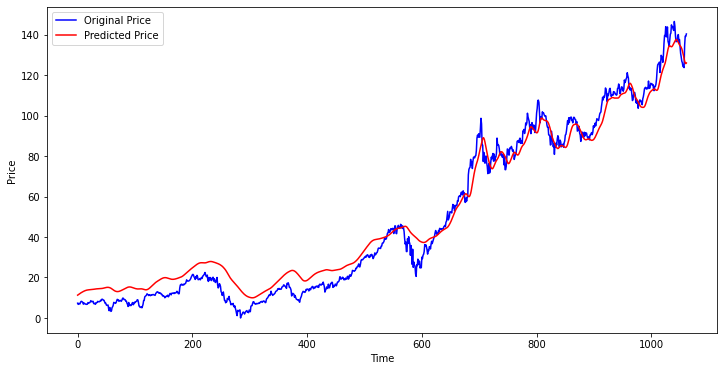

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()